# Guide to creating custom retail datasets

## Table of Contents

1. [Step 1. Foreground Images (bottles, boxes, etc)](#s1)
1. [Step 2: Background Images](#s2)
1. [Step 3: Add these images to the config](#s3)
1. [Step 4: Generating the dataset](#s4)

### <a name="s1"></a>Step 1.  Foreground Images (bottles, boxes, etc)

1. Download and save the image as **.png**. 
2. Follow any one of the methods on this page [page](https://www.colorexpertsbd.com/blog/remove-image-background-using-gimp) to remove the background and isolate the object alone. I prefer the **Fuzzy Selection Tool** method.
3. Once the background is removed, resize the canvas size to fit the image **as tight as possible**. Select **Image > Canvas Size** from the tool bar and input the appropriate height and width. Also click the **centre** button to ensure that the image is present at the centre of the canvas. Note down the **height and width** of the resized canvas.
4. Save the image as a png in the **img_templates** folder under a suitable category. (Use **File > Export As**).

The foreground object image should ideally look like this in GIMP after you are done with all the processing:

<img src="demo_imgs/final_fr_img.PNG" alt="drawing" width="400"/>



### <a name="s2"></a>Step 2: Background Images

1. While adding a new background image the most important point that you need to keep in mind is that data generation script expects a constant shelf height. 

**Ideal Background**:

<img src="demo_imgs/ideal_bg.jpg" alt="drawing" width="400"/>

** Non ideal**
<img src="demo_imgs/non_ideal_bg.jpg" alt="drawing" width="200"/>

For non ideal cases we may have to apply some perspective transformations to rectify the orientation. (In progress)

2. Once you have a background that satisfies the above criteria, open the image in GIMP (or any other image editing software) and note down the following properties.

    - number of shelves
    - the shelf region: The top-left and bottom-right points of the region where you need the foreground objects to be placed.
    - shelf height: Height in pixels between two consecutive shelves.
    - shelf positions: The y coordinate of each shelf top.

For example:
<img src="demo_imgs/bg_measures.jpg" alt="drawing" width="600"/>
   

### <a name="s3"></a>Step 3: Add these images to the config.

1. Once you have a new foreground/ background image after completing the above steps, you need to add it to the collection.

#### Adding Foreground Images
1. Copy the transparent .png created in **Step 1** to the appropriate folder inside **img_templates/foregrounds/**. Make sure that it has a unique name (label).

2. Use the template manager script to register the image config and add the image to the foreground image collection.


#### Adding Background Images
1. Copy the background image created in **Step 2** to the appropriate folder inside **img_templates/backgrounds/**. Make sure that it has a unique name (label).

2. Use the template manager script to register the image config and add the image to the background image collection.

### Examples

In [1]:
import os
import json
import pprint

In [2]:
# TODO(havanagrawal): The template_manager also needs an update to deal with the new configuration format

In [3]:
# importing the Template Manager module
from src.template_manager.template_manager import TemplateManager

In [4]:
os.listdir("img_templates/backgrounds/")

['supermarket_shelf_0.jpg',
 'supermarket_shelf_1.jpg',
 'supermarket_shelf_2.jpg',
 '.DS_Store',
 'wooden_shelf.jpg',
 'small_shelf_stock.jpg',
 'blue_vector_shelf.jpg',
 'large_shelf_stock.jpg']

In [5]:
def pretty_print_config(config_type):
    if config_type == "bg":
        pprint.pprint(json.load(open("config/backgrounds.json")))
    elif config_type == "fg":
        pprint.pprint(json.load(open("config/foregrounds.json")))
    else:
        raise ValueError("config_type must be one of ['bg', 'fg'], got {}".format(config_type))

In [6]:
pretty_print_config("bg")

{'large_shelf_stock': {'num_shelves': 5,
                       'shelf_ht': 80,
                       'shelf_region': [[133, 133], [1000, 572]],
                       'shelf_y_positions': [207, 298, 391, 483, 573]},
 'small_shelf_stock': {'num_shelves': 5,
                       'shelf_ht': 165,
                       'shelf_region': [[96, 11], [695, 887]],
                       'shelf_y_positions': [157, 341, 525, 710, 887]}}


#### Creating the manager instance

In [7]:
mgr = TemplateManager(config_path="config/")

#### Adding a Background Image configuration

In [8]:
# Using the values obtained during Step-2
background_args = {
    "shelf_region" : ((96,11),(695, 887)),
    "shelf_ht" : 165,
    "num_shelves" : 5,
    "shelf_y_positions": (157,341,525,710,887)
}

# !!!! The label should be the same as the image name
# But for the sake of illustration (and reproducibility), it is given a temporary label
mgr.add_template(
    label="dummy_label",
    template_type="background",
    **background_args
)

New background object dummy_label configured.


In [9]:
pretty_print_config("bg")

{'dummy_label': {'num_shelves': 5,
                 'shelf_ht': 165,
                 'shelf_region': [[96, 11], [695, 887]],
                 'shelf_y_positions': [157, 341, 525, 710, 887]},
 'large_shelf_stock': {'num_shelves': 5,
                       'shelf_ht': 80,
                       'shelf_region': [[133, 133], [1000, 572]],
                       'shelf_y_positions': [207, 298, 391, 483, 573]},
 'small_shelf_stock': {'num_shelves': 5,
                       'shelf_ht': 165,
                       'shelf_region': [[96, 11], [695, 887]],
                       'shelf_y_positions': [157, 341, 525, 710, 887]}}


#### Deleting the image configuration

In [10]:
# Deleting background image.
mgr.del_template(
    label="dummy_label", 
    template_type="background"
)

background object dummy_label removed.


In [11]:
pretty_print_config("bg")

{'large_shelf_stock': {'num_shelves': 5,
                       'shelf_ht': 80,
                       'shelf_region': [[133, 133], [1000, 572]],
                       'shelf_y_positions': [207, 298, 391, 483, 573]},
 'small_shelf_stock': {'num_shelves': 5,
                       'shelf_ht': 165,
                       'shelf_region': [[96, 11], [695, 887]],
                       'shelf_y_positions': [157, 341, 525, 710, 887]}}


#### Adding new foreground category

In [12]:
mgr.add_foreground_category(category="cans")

New foreground category cans added.


In [13]:
pretty_print_config("fg")

{'bags': {'bag1': {'height': 256, 'width': 190},
          'bag2': {'height': 395, 'width': 370},
          'bag3': {'height': 355, 'width': 260},
          'bag4': {'height': 418, 'width': 488}},
 'bottles': {'bottle_1': {'height': 500, 'width': 188},
             'bottle_10': {'height': 645, 'width': 220},
             'bottle_11': {'height': 800, 'width': 230},
             'bottle_12': {'height': 1140, 'width': 400},
             'bottle_13': {'height': 447, 'width': 146},
             'bottle_14': {'height': 500, 'width': 130},
             'bottle_15': {'height': 370, 'width': 95},
             'bottle_16': {'height': 600, 'width': 180},
             'bottle_2': {'height': 438, 'width': 124},
             'bottle_3': {'height': 272, 'width': 86},
             'bottle_4': {'height': 355, 'width': 132},
             'bottle_5': {'height': 388, 'width': 118},
             'bottle_6': {'height': 450, 'width': 150},
             'bottle_7': {'height': 478, 'width': 172},
             

#### Adding new foreground template.

In [14]:
# Using the values obtained during Step-1
foreground_args = {
    "category": "cans",
    "height": 600,
    "width": 180
}

# !!!! The label should be the same as the image name
# But for the sake of illustration (and reproducibility), it is given a temporary label
mgr.add_template(
    label="can_16", 
    template_type="foreground",
    **foreground_args
)

New foreground object can_16 configured.


In [15]:
pretty_print_config("fg")

{'bags': {'bag1': {'height': 256, 'width': 190},
          'bag2': {'height': 395, 'width': 370},
          'bag3': {'height': 355, 'width': 260},
          'bag4': {'height': 418, 'width': 488}},
 'bottles': {'bottle_1': {'height': 500, 'width': 188},
             'bottle_10': {'height': 645, 'width': 220},
             'bottle_11': {'height': 800, 'width': 230},
             'bottle_12': {'height': 1140, 'width': 400},
             'bottle_13': {'height': 447, 'width': 146},
             'bottle_14': {'height': 500, 'width': 130},
             'bottle_15': {'height': 370, 'width': 95},
             'bottle_16': {'height': 600, 'width': 180},
             'bottle_2': {'height': 438, 'width': 124},
             'bottle_3': {'height': 272, 'width': 86},
             'bottle_4': {'height': 355, 'width': 132},
             'bottle_5': {'height': 388, 'width': 118},
             'bottle_6': {'height': 450, 'width': 150},
             'bottle_7': {'height': 478, 'width': 172},
             

#### Deleting foreground image

In [16]:
mgr.del_template(
    label="can_16",
    template_type="foreground", 
    category="cans"
)

foreground object can_16 removed.


#### Deleting foreground category.

In [17]:
mgr.del_foreground_category(category="cans")

Removed category cans and all associated objects.


### <a name="s4"></a>Step 4: Generating the dataset

In [18]:
import glob
import shutil

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# Importing the synthesizer module
from src.data_synthesizer.data_synthesizer_v2 import DataSynthesizer

In [20]:
print(DataSynthesizer.__doc__)

Synthetic Dataset creator for Mask RCNN

        Arguments
        ---------
        config_path: path-like, str
            The relative/absolute path to the configuration directory
            It is expected to contain three files:
                - backgrounds.json
                - foregrounds.json
                - class_map.json

        template_path: path-like, str
            The relative/absolute path to the template image directory
            It is expected to have the following directories
                - foregrounds
                - backgrounds
            The backgrounds directory itself must have directories named by
            categories.

        seed: int, default=None
            The seed used for the random number generation. This should be
            initialized in case replicable datasets are desired.

            NOTE: If the configuration files are modified, setting the seed will
                  NOT generate the same dataset, i.e. configuration changes
 

In [21]:
# Initializing the instance
config_path = "config/v2/"       # where the backgrounds.json and foregrounds.json files are located
template_path = "img_templates/" # where the foreground and background templates are located
              

synthesizer = DataSynthesizer(config_path, template_path, seed=43)

In [22]:
synthesizer.bg_labels

['large_shelf_stock',
 'small_shelf_stock',
 'blue_vector_shelf',
 'supermarket_shelf_0',
 'supermarket_shelf_1',
 'supermarket_shelf_2',
 'wooden_shelf']

In [23]:
print(synthesizer.generate_synthetic_dataset.__doc__)

Synthesize an image dataset

            Arguments
            ---------
            n: int
                the number of images to be generated.

            output_dir: path-like, str
                The output directory to which the generated dataset is written.

            categories: list, default: ["bottles"]
                a list of categories from which objects will be selected. Should
                match the keys in the foreground config file.

            rotation_probability: float, default=0.1:
                The probability of rotating an image,
                in other words, the proportion of rotated objects

            max_x_offset: int, default=1
                The maximum number of pixels present between two images.

            obj_sizes_allowed: list, default=OBJECT_SIZES
                the allowed variation in sizes for the objects.
                Use SMALL, MEDIUM and LARGE from the ObjectSize enum

            max_objs_in_pack: int, default=3
           

In [24]:
output_dir = "data/"

# We use the following dimensions to display the images
r, c = 3, 3

# Generating the data
save_path = synthesizer.generate_synthetic_dataset(
    n = r*c,
    output_dir = output_dir,
    categories = ["bottles", "bags", "boxes"],
    rotation_probability = 0,
    max_objs_in_pack = 2,
    max_x_offset = 10
)

Generating image 1 of 9
Generating image 2 of 9
Generating image 3 of 9
Generating image 4 of 9
Generating image 5 of 9
Generating image 6 of 9
Generating image 7 of 9
Generating image 8 of 9
Generating image 9 of 9
Done.


In [25]:
save_path

'data/synth_data_2019_03_03_10_17_57'

In [26]:
train_images = glob.glob(save_path + "/image*/train_image/*png")
train_images

['data/synth_data_2019_03_03_10_17_57/image_4_2019_03_03_10_17_57/train_image/image_4_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_5_2019_03_03_10_17_57/train_image/image_5_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_6_2019_03_03_10_17_57/train_image/image_6_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_7_2019_03_03_10_17_57/train_image/image_7_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_1_2019_03_03_10_17_57/train_image/image_1_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_0_2019_03_03_10_17_57/train_image/image_0_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_3_2019_03_03_10_17_57/train_image/image_3_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_2_2019_03_03_10_17_57/train_image/image_2_2019_03_03_10_17_57.png',
 'data/synth_data_2019_03_03_10_17_57/image_8_2019_03_03_10_17_57/train_image/image_8_2019_03_03_10_17_5

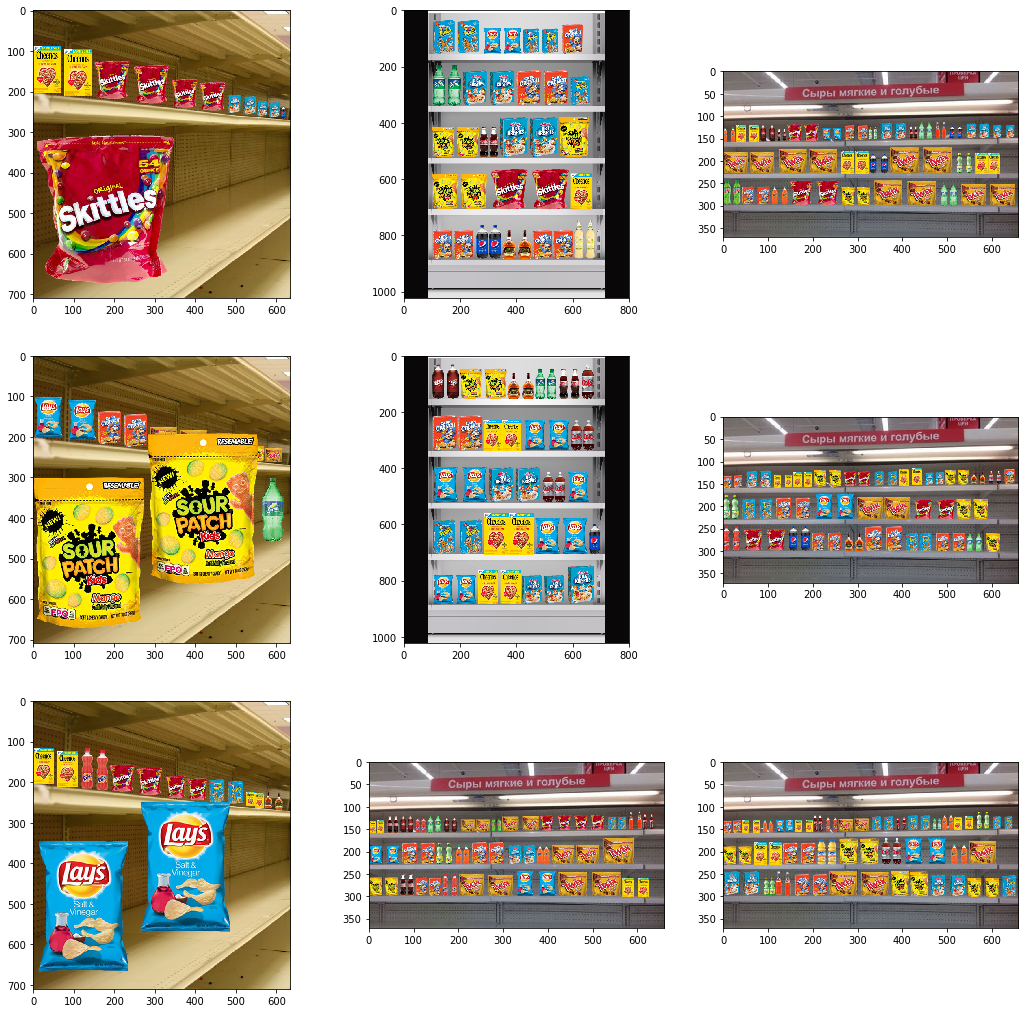

In [27]:
f, axes = plt.subplots(r, c, figsize=(18, 18))
axes = axes.ravel()
for i, image in enumerate(train_images):
    im = Image.open(image)
    axes[i].imshow(im)

In [28]:
# Cleanup generated data
shutil.rmtree(save_path)